## 数字の不思議と面白さ
目標：小学生４〜６年生を対象に、数字の不思議な面と面白さを、具体例を用いて伝えていきます。  

1. 指折り掛け算 : 9の段の指折り掛け算をやってみます  
2. カプレカ数を計算してみよう  
3桁のカプレカ数：495,  4桁のカプレカ数 : 6174  
「3桁 の各桁を大きい順に並べた数」-「 3桁 の各桁を小さい順に並べた数」
を繰り返し計算していくと、「495」になります。  
3.	7で割り切れる数  
3桁の1~9の数字を自由に作って、その同じ3桁の数字を並べて6桁にします。その数字を7で割ると、余りは0になります。  
4.	11×11=121  
1が並んだ掛け算は綺麗な対称性を持ちます。プログラムを使って大きな数字を計算してその様子を見てみます  
5.	コッホ曲線  
有名なコッホ曲線を書いてみます。N=2あたりまで手書きで描いてみて、あとはプログラムで描いていきます。プログラムではカメが動いて描いていくので描いている様子がわかります。



In [ ]:
!pip install mobilechelonian

In [ ]:
!pip3 install ColabTurtle
!pip install japanize-matplotlib
from ColabTurtle.Turtle import *
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib

In [43]:
#https://mukai-lab.info/pages/classes/seminar_core_areas_learning/chapter_3_3/
def drawKoch(dim, p1, p2):

  points = []

  import ColabTurtle.Turtle as turtle
  turtle.initializeTurtle()
  
  speed(13)
  penup()
  goto(p1[0], p1[1])
  right(90)
  koch(dim, p1, p2)

In [44]:
def koch(dim, p1, p2):

  p = np.array(p2) - np.array(p1) #線分のベクトル
  d = np.linalg.norm(p, ord=2) / 3 #線分を3等分した長さ

  q1 = p1 #左の端点
  goto(q1[0], q1[1])

  if(dim == 1):
    pendown()

  forward(d)
  q2 = position() #1番目の分割点

  if(dim > 1):
    koch(dim-1, q1, q2) #再起処理

  left(60)
  forward(d)
  q3 = position() #三角形の頂点
  if(dim > 1):
    koch(dim-1, q2, q3) #再起処理

  right(120)
  forward(d)
  q4 = position() #2番目の分割点
  if(dim > 1):
    koch(dim-1, q3, q4) #再起処理

  left(60)
  forward(d)
  q5 = position() #右の端点
  if(dim > 1):
    koch(dim-1, q4, q5) #再起処理

  penup()

In [66]:
p1 = [0, 400]
p2 = [800, 400]
drawKoch(3, p1, p2)

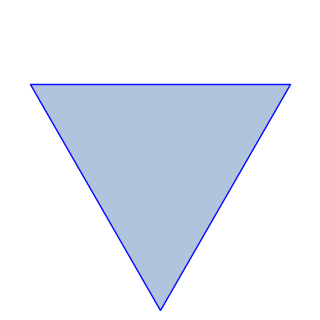

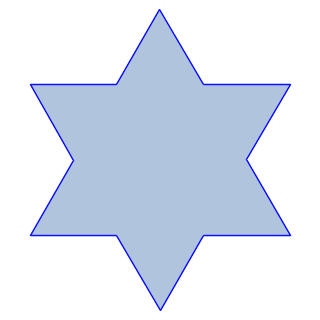

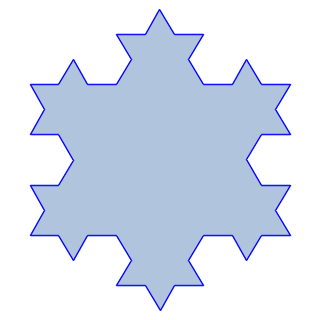

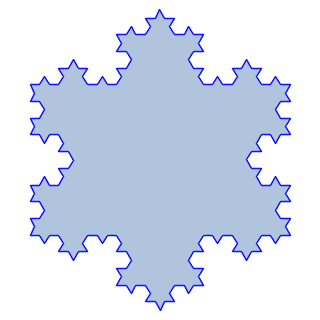

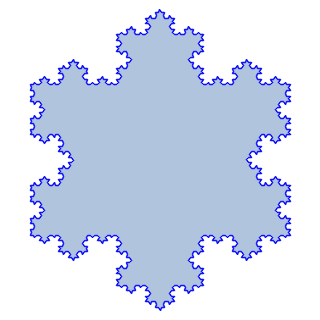

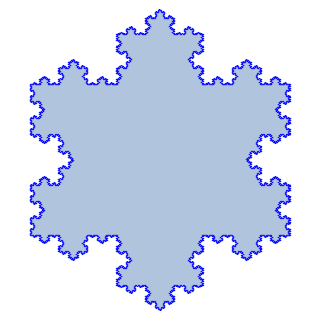

In [63]:
# https://emotionexplorer.blog.fc2.com/blog-entry-240.html?sp
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def koch_snowflake_complex(order, scale):
    if order == 0:
        # 初期三角形
        angles = np.array([0, 120, 240]) + 90
        return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
    else:
        ZR = 0.5 - 0.5j * np.sqrt(3) / 3

        p1 = koch_snowflake_complex(order - 1, scale)  # 始点
        p2 = np.roll(p1, shift=-1)  # 終点
        dp = p2 - p1                # 接続ベクトル

        new_points = np.empty(len(p1) * 4, dtype=np.complex128)
        new_points[::4] = p1
        new_points[1::4] = p1 + dp / 3
        new_points[2::4] = p1 + dp * ZR
        new_points[3::4] = p1 + dp / 3 * 2
        return new_points

# コッホ曲線の計算
#
# コッホ曲線の点座標の2つのリストx、y
#
# order : 再帰の深さ
# scale : コッホ曲線雪結晶の範囲（元三角形の辺の長さ）。
#
def koch_snowflake(order, scale=10):
    points = koch_snowflake_complex(order, scale)
    return (points.real, points.imag)

def main():
    width, height = 320, 320
    cx = width // 2
    cy = height // 2

    for i in range(0,6):
        img = np.full((height, width, 3), (255,255,255), np.uint8)

        # コッホ曲線の計算
        fax, fay = koch_snowflake(order=i, scale=260)

        pts = np.empty((0,2), float) 
        for x, y in zip(fax, fay):
            pts = np.append(pts, [[x+cx, y+cy]], axis=0)
        pts = pts.astype(np.int32)

        # ベタ塗りコッホ曲線描画
        img = cv2.fillPoly(img, [pts], (222,196 ,176 ), lineType=cv2.LINE_AA)

        # コッホ曲線の線描画
        img = cv2.polylines(img,[pts],True,(255,0,0),1, cv2.LINE_AA)
        cv2_imshow(img)
        #cv2_waitKey(0)

if __name__ == '__main__':
    main()

In [67]:
initializeTurtle(initial_window_size=(400,400), initial_speed=10)
# 描画エリアのサイズ：４００ｘ４００、ペンの動く速さ：１０で初期化
# ペンの位置の初期値は画面の中央
bgcolor('white') # 背景の色：白
color('blue')    # ペンの色：青
width(2)         # ペンのサイズ：２
l = 50           # １辺の長さ
m = 10           # 回数
n = 10           # ｎ角形
for i in range(m):
    for j in range(n):
        forward(l)
        left(360/n)
    left(360/m)
hideturtle()     # タートルを隠す

In [68]:
#P23 https://github.com/hackingmath/Math-Adventures/blob/master/myturtles.py
import ColabTurtle.Turtle as turtle
turtle.initializeTurtle()
shape('turtle')
speed(7) #this line makes the turtle go faster

def square(sidelength=100):
    for i in range(4):
        forward(sidelength)
        right(90)

def triangle(sidelength = 100):
    for i in range(3):
        forward(sidelength)
        right(120)

def polygon(sides,sidelength = 100):
    for i in range(sides):
        forward(sidelength)
        right(360/sides)


def squareCircle():
    '''Draws a circle of squares'''
    for i in range(60):
        square(200)
        right(5)

def star(sidelength = 200):
    for i in range(5):
        forward(sidelength)
        right(144)

def starSpiral():
    length = 5
    for i in range(60):
        star(length)
        length += 5
        rt(5)
        
#call the function you want to execute here:
starSpiral()